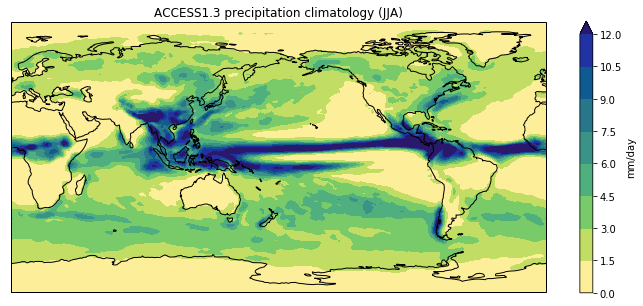

In [7]:
#This is a new message

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

access_pr_file = 'Desktop/data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

dset = xr.open_dataset(access_pr_file)

clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=np.arange(0, 13.5, 1.5),
                                     extend='max',
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'label': clim.units},
                                     cmap=cmocean.cm.haline_r)
ax.coastlines()

title = '%s precipitation climatology (JJA)' %(dset.attrs['model_id'])
plt.title(title)

plt.show()


In [22]:
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines
    
    """

    dset = xr.open_dataset(pr_file)

    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

    clim.data = clim.data * 86400
    clim.attrs['units'] = 'mm/day'

    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                                          levels=np.arange(0, 13.5, 1.5),
                                          extend='max',
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'label': clim.units},
                                          cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    title = '%s precipitation climatology (%s)' %(dset.attrs['model_id'], season)
    plt.title(title)



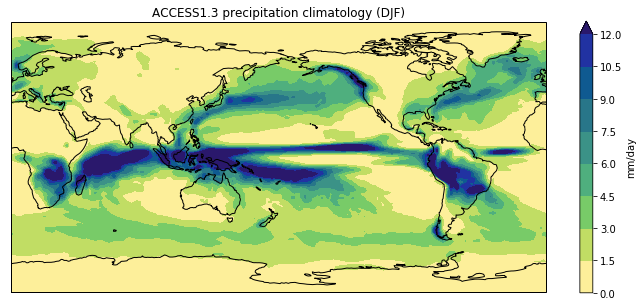

In [23]:
plot_pr_climatology('Desktop/data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc', 'DJF')
plt.show()

In [10]:

def convert_pr_units(darray):
    
   
   darray.data = darray.data * 86400
   darray.attrs['units'] = 'mm/day'
   
   return darray

In [11]:
def create_plot(clim, model_name, season, gridlines=False):
    
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                                          levels=np.arange(0, 13.5, 1.5),
                                          extend='max',
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'label': clim.units},
                                          cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    title = '%s precipitation climatology (%s)' %(dset.attrs['model_id'], season)
    plt.title(title)



In [24]:
def plot_pr_climatology(pr_file, season, gridlines=False):
    

        dset = xr.open_dataset(pr_file)
        clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)
        clim = convert_pr_units(clim)
        create_plot(clim, dset.attrs['model_id'], season)
        plt.show()

    

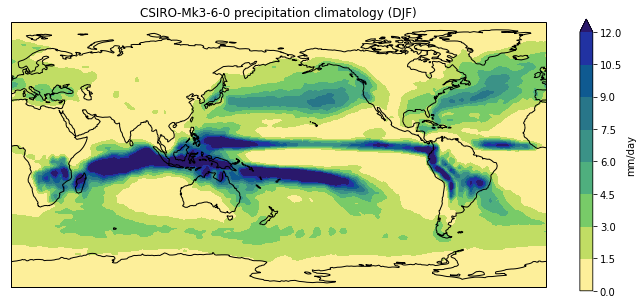

In [25]:
plot_pr_climatology('Desktop/data/pr_Amon_CSIRO-Mk3-6-0_historical_r1i1p1_200101-200512.nc', 'DJF')
plt.show()
